Muestra de datos:
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Información de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB

Conteo de valores faltantes:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Datos entrenamiento: (160, 3)
Datos prueba: (40, 3)

Coeficientes del regresor:
[3.76419618 2.79230665 0.05597551]

Comparación predicciones (primeros 5):
Pred: 16.41, Real: 16.9
Pred: 20.89, Real: 22.4
Pred: 21.55, Real: 21.4
Pred: 10.61, Real: 7.3
Pred: 22.11, 

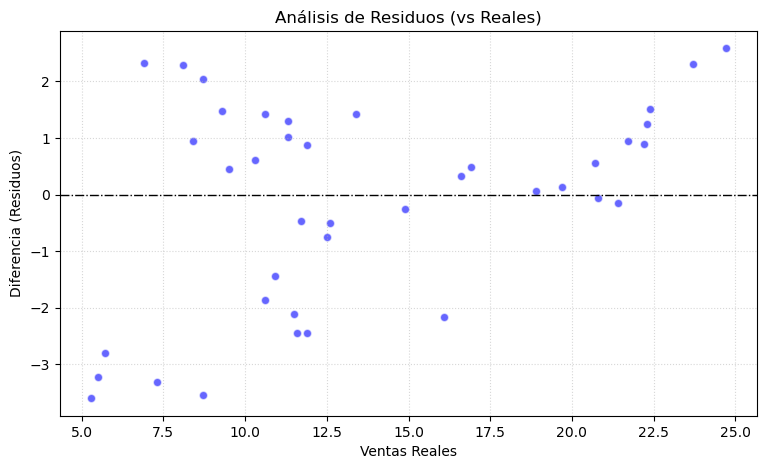

C:\Users\braya\AppData\Local\Temp\ipykernel_18900\1164825927.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impacto', y='Variable', data=df_coefs, palette='viridis')


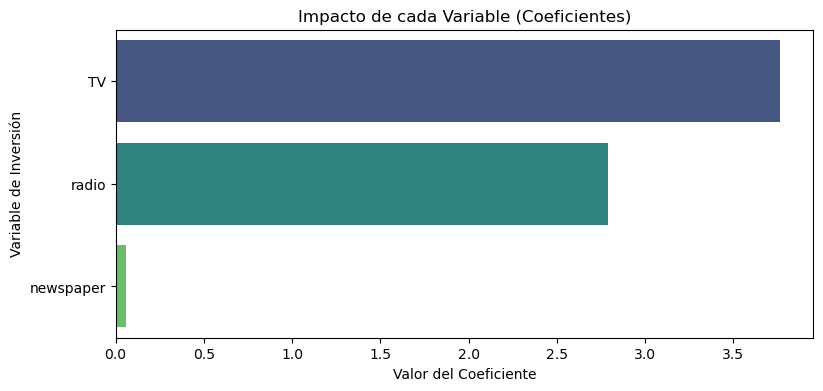

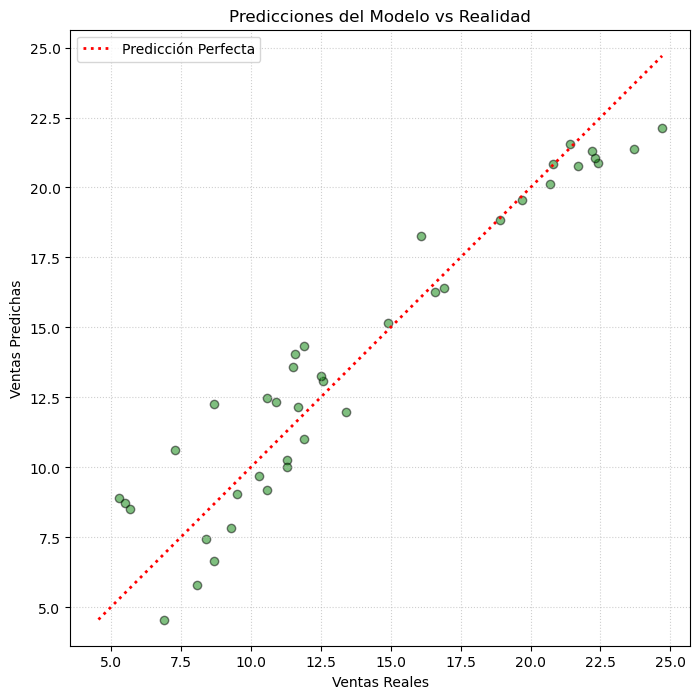

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

fuente_datos = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
datos = pd.read_csv(fuente_datos, index_col=0)

print("Muestra de datos:")
print(datos.head())

print("\nInformación de tipos de datos:")
datos.info()

print("\nConteo de valores faltantes:")
print(datos.isnull().sum())

caracteristicas = datos[['TV', 'radio', 'newspaper']]
objetivo = datos['sales']

X_ent, X_pru, y_ent, y_pru = train_test_split(caracteristicas, objetivo, test_size=0.2, random_state=42)

print(f"\nDatos entrenamiento: {X_ent.shape}")
print(f"Datos prueba: {X_pru.shape}")

escalador = StandardScaler()
X_ent_esc = escalador.fit_transform(X_ent)
X_pru_esc = escalador.transform(X_pru)

regresor = LinearRegression()
regresor.fit(X_ent_esc, y_ent)

predicciones = regresor.predict(X_pru_esc)

print("\nCoeficientes del regresor:")
print(regresor.coef_)

print("\nComparación predicciones (primeros 5):")
for i in range(5):
    print(f"Pred: {predicciones[i]:.2f}, Real: {y_pru.iloc[i]}")

r2_val = r2_score(y_pru, predicciones)
mse_val = mean_squared_error(y_pru, predicciones)
rmse_val = np.sqrt(mse_val)

print("\nMétricas de evaluación:")
print(f"R2 score: {r2_val:.4f}")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")

errores = y_pru - predicciones

plt.figure(figsize=(9, 5))
plt.scatter(y_pru, errores, alpha=0.6, color='blue', edgecolors='w', marker='o')
plt.axhline(y=0, color='black', linestyle='-.', linewidth=1)
plt.xlabel("Ventas Reales")
plt.ylabel("Diferencia (Residuos)")
plt.title("Análisis de Residuos (vs Reales)")
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

nombres_caracteristicas = caracteristicas.columns
coefs = regresor.coef_

df_coefs = pd.DataFrame({
    'Variable': nombres_caracteristicas, 
    'Impacto': coefs
})
df_coefs = df_coefs.sort_values(by='Impacto', ascending=False)

plt.figure(figsize=(9, 4))
sns.barplot(x='Impacto', y='Variable', data=df_coefs, palette='viridis')
plt.title('Impacto de cada Variable (Coeficientes)')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable de Inversión')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_pru, predicciones, alpha=0.5, color='green', edgecolors='k')

min_val = min(y_pru.min(), predicciones.min())
max_val = max(y_pru.max(), predicciones.max())

plt.plot([min_val, max_val], [min_val, max_val], 'r:', lw=2, label='Predicción Perfecta')
plt.title('Predicciones del Modelo vs Realidad')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.axis('equal')
plt.show()